<a href="https://www.inove.com.ar"><img src="https://github.com/hernancontigiani/ceia_memorias_especializacion/raw/master/Figures/logoFIUBA.jpg" width="500" align="center"></a>


# Procesamiento de lenguaje natural
## RNN one-to-one

#### Datos
El objecto es utilizar una serie de sucuencias númericas (datos sintéticos) para poner a prueba el uso de las redes RNN. Este ejemplo se inspiró en otro artículo, lo tienen como referencia en el siguiente link:\
[LINK](https://stackabuse.com/solving-sequence-problems-with-lstm-in-keras/)

In [1]:
import re

import numpy as np
import pandas as pd

from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM, SimpleRNN
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional

In [2]:
# Generar datos sintéticos
X = list()
y = list()
X = [x+1 for x in range(20)]

# "y" (target) se obtiene como cada dato de entrada multiplicado por 15
y = [x * 15 for x in X]

print("datos X:", X)
print("datos y:", y)

datos X: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
datos y: [15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300]


In [3]:
# Cada dato X lo transformarmos en una matriz de 1 fila 1 columna (1x1)
X = np.array(X).reshape(len(X), 1, 1)
print("datos X:", X)

datos X: [[[ 1]]

 [[ 2]]

 [[ 3]]

 [[ 4]]

 [[ 5]]

 [[ 6]]

 [[ 7]]

 [[ 8]]

 [[ 9]]

 [[10]]

 [[11]]

 [[12]]

 [[13]]

 [[14]]

 [[15]]

 [[16]]

 [[17]]

 [[18]]

 [[19]]

 [[20]]]


In [4]:
y = np.asanyarray(y)
y.shape

(20,)

### 2 - Entrenar el modelo (RNN y LSTM)

In [5]:
input_shape = X[0].shape
input_shape

(1, 1)

In [6]:
output_shape = 1

In [7]:
# Comenzamos con una RNN clásica
# En general una celda RNN clásica ya no se utiliza, es solo a modo de ejemplo
model = Sequential()
model.add(SimpleRNN(64, activation='relu', input_shape=input_shape))
model.add(Dense(output_shape))
model.compile(loss='mse',
              optimizer="Adam")

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 64)                4224      
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [8]:
hist = model.fit(X, y, epochs=500, validation_split=0.2, batch_size=5)

Epoch 1/500
4/4 [==============================] - 1s 83ms/step - loss: 20910.6035 - val_loss: 76616.2266
Epoch 2/500
4/4 [==============================] - 0s 9ms/step - loss: 20834.2656 - val_loss: 76348.4922
Epoch 3/500
4/4 [==============================] - 0s 9ms/step - loss: 20757.0234 - val_loss: 76067.1094
Epoch 4/500
4/4 [==============================] - 0s 10ms/step - loss: 20679.5566 - val_loss: 75790.5859
Epoch 5/500
4/4 [==============================] - 0s 11ms/step - loss: 20606.8145 - val_loss: 75531.4609
Epoch 6/500
4/4 [==============================] - 0s 10ms/step - loss: 20528.7129 - val_loss: 75289.6328
Epoch 7/500
4/4 [==============================] - 0s 11ms/step - loss: 20465.6719 - val_loss: 75045.5469
Epoch 8/500
4/4 [==============================] - 0s 11ms/step - loss: 20398.0449 - val_loss: 74802.7500
Epoch 9/500
4/4 [==============================] - 0s 12ms/step - loss: 20324.7578 - val_loss: 74568.8438
Epoch 10/500
4/4 [==============================

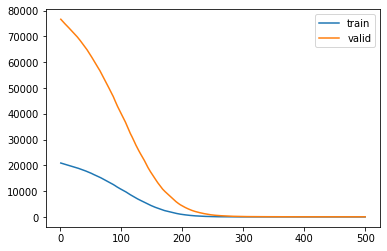

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento
epoch_count = range(1, len(hist.history['loss']) + 1)
sns.lineplot(x=epoch_count,  y=hist.history['loss'], label='train')
sns.lineplot(x=epoch_count,  y=hist.history['val_loss'], label='valid')
plt.show()

In [12]:
y_hat = model.predict(test_input, verbose=0)
y_hat

array([[429.]], dtype=float32)

In [13]:
15*30

450

In [11]:
# Ensayo
# x = 30
# y_test = x * 15

x_test = 30
y_test = x_test * 15
test_input = np.array([x_test])
test_input = test_input.reshape((1, 1, 1))
y_hat = model.predict(test_input, verbose=0)[0][0]

print("y_test:", y_test)
print("y_hat:", y_hat)

model.evaluate(test_input, np.array([y_test]))

y_test: 450
y_hat: 429.0
1/1 [==============================] - 0s 22ms/step - loss: 441.0000


441.0

In [14]:
# Ahora probaremos con LSTM, qué es más compleja y por lo tanto
# requiere más parámetros a entrenar
model2 = Sequential()
model2.add(LSTM(64, activation='relu', input_shape=input_shape))
model2.add(Dense(output_shape))
model2.compile(loss='mse',
              optimizer="Adam")
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [15]:
hist2 = model2.fit(X, y, epochs=500, validation_split=0.2, batch_size=5)

Epoch 1/500
4/4 [==============================] - 1s 78ms/step - loss: 20981.1211 - val_loss: 76971.9688
Epoch 2/500
4/4 [==============================] - 0s 9ms/step - loss: 20949.1953 - val_loss: 76827.2812
Epoch 3/500
4/4 [==============================] - 0s 11ms/step - loss: 20911.4844 - val_loss: 76685.0312
Epoch 4/500
4/4 [==============================] - 0s 12ms/step - loss: 20872.5078 - val_loss: 76536.9609
Epoch 5/500
4/4 [==============================] - 0s 9ms/step - loss: 20836.3496 - val_loss: 76381.8672
Epoch 6/500
4/4 [==============================] - 0s 10ms/step - loss: 20798.4648 - val_loss: 76228.2500
Epoch 7/500
4/4 [==============================] - 0s 10ms/step - loss: 20757.3848 - val_loss: 76073.6953
Epoch 8/500
4/4 [==============================] - 0s 12ms/step - loss: 20719.4414 - val_loss: 75912.2656
Epoch 9/500
4/4 [==============================] - 0s 11ms/step - loss: 20679.9160 - val_loss: 75738.7891
Epoch 10/500
4/4 [==============================

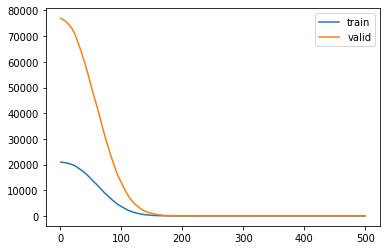

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento
epoch_count = range(1, len(hist2.history['loss']) + 1)
sns.lineplot(x=epoch_count,  y=hist2.history['loss'], label='train')
sns.lineplot(x=epoch_count,  y=hist2.history['val_loss'], label='valid')
plt.show()

In [17]:
# Ensayo
# x = 30
# y_test = x * 15

x_test = 30
y_test = x_test * 15
test_input = np.array([x_test])
test_input = test_input.reshape((1, 1, 1))
y_hat = model2.predict(test_input, verbose=0)[0][0]

print("y_test:", y_test)
print("y_hat:", y_hat)

model2.evaluate(test_input, np.array([y_test]))

y_test: 450
y_hat: 435.5917
1/1 [==============================] - 0s 17ms/step - loss: 207.5990


207.5989532470703

Se puede observar que para un problema tan simple como este no hay mucha diferencia entre utilizar una RNN o LSTM.

### 3 - Multi-layer LSTM

In [18]:
# En esta oportunidad se utilizarán dos layer LSTM. Para poder conectar
# la primera layer con la segunda se debe colocar return_sequences=True

model3 = Sequential()
model3.add(LSTM(64, activation='relu', return_sequences=True, input_shape=input_shape))
model3.add(LSTM(64, activation='relu'))
model3.add(Dense(output_shape))
model3.compile(loss='mse',
              optimizer="Adam")

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 64)             16896     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
_________________________________________________________________


In [19]:
hist3 = model3.fit(X, y, epochs=500, validation_split=0.2, batch_size=5)

Epoch 1/500
4/4 [==============================] - 3s 124ms/step - loss: 21034.3262 - val_loss: 77247.9922
Epoch 2/500
4/4 [==============================] - 0s 11ms/step - loss: 21020.8652 - val_loss: 77199.7969
Epoch 3/500
4/4 [==============================] - 0s 10ms/step - loss: 21004.5957 - val_loss: 77143.6562
Epoch 4/500
4/4 [==============================] - 0s 11ms/step - loss: 20990.2559 - val_loss: 77078.1484
Epoch 5/500
4/4 [==============================] - 0s 10ms/step - loss: 20971.6914 - val_loss: 76999.3594
Epoch 6/500
4/4 [==============================] - 0s 11ms/step - loss: 20949.9785 - val_loss: 76899.0312
Epoch 7/500
4/4 [==============================] - 0s 12ms/step - loss: 20924.2383 - val_loss: 76760.9531
Epoch 8/500
4/4 [==============================] - 0s 10ms/step - loss: 20885.3652 - val_loss: 76578.1328
Epoch 9/500
4/4 [==============================] - 0s 13ms/step - loss: 20842.5469 - val_loss: 76327.5234
Epoch 10/500
4/4 [===========================

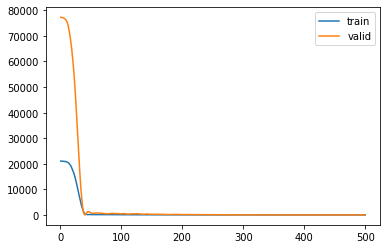

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento
epoch_count = range(1, len(hist3.history['loss']) + 1)
sns.lineplot(x=epoch_count,  y=hist3.history['loss'], label='train')
sns.lineplot(x=epoch_count,  y=hist3.history['val_loss'], label='valid')
plt.show()

In [21]:
# Ensayo
# x = 30
# y_test = x * 15

x_test = 30
y_test = x_test * 15
test_input = np.array([x_test])
test_input = test_input.reshape((1, 1, 1))
y_hat = model3.predict(test_input, verbose=0)[0][0]

print("y_test:", y_test)
print("y_hat:", y_hat)

model3.evaluate(test_input, np.array([y_test]))

y_test: 450
y_hat: 448.80844
1/1 [==============================] - 0s 20ms/step - loss: 1.4198


1.4198124408721924

### 4 - Conclusión
Implementar un modelo basado en RNN o LSTM es muy sensillo, hay que tener en cuenta que al apilar varias layers hay que colocar el flag "return_sequence" en "True".
El resultado alcanzado es bueno pero podría mejorarse agregando más layer LSTM o más layer Densas